### Линейные преобразования (Linear Mappings)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotVectors(v_1, v_2, limits=3):
    """Отрисовка наборов двумерных векторов v_1 и v_2"""
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(11, 5)
    
    v_1T, v_2T = v_1.transpose(), v_2.transpose()
    size = v_1.shape[0]
    colors = np.array([i for i in range(size)])

    for axis in ax:
        axis.set_xticks([])     # убираются надписи на шкалах
        axis.set_yticks([])     # 
        axis.spines['bottom'].set_position('zero')  # центрирование осей
        axis.spines['left'].set_position('zero')    # в начало координат
        axis.spines['top'].set_visible(False)       # делаем боковые оси
        axis.spines['right'].set_visible(False)     # невидимыми
        axis.set_xlim(-limits, limits)          # область отображения x
        axis.set_ylim(-limits, limits)          # область отображения y

    # отрисовка наборов векторов
    ax[0].scatter(v_1T[0], v_1T[1], marker='.', c=colors, cmap='cividis')
    ax[1].scatter(v_2T[0], v_2T[1], marker='.', c=colors, cmap='cividis')

создадим исходный набор двумерных векторов, заключенных в квадрат

In [3]:
x = np.arange(-1, 1.1, 0.1)
origin_v = np.array([[i, j] for i in x for j in x])
print(f"всего {origin_v.shape[0]} векторов")
print(origin_v[:5])

всего 441 векторов
[[-1.  -1. ]
 [-1.  -0.9]
 [-1.  -0.8]
 [-1.  -0.7]
 [-1.  -0.6]]


Поворот вокруг начала координат

0.707, -0.707
0.707, 0.707


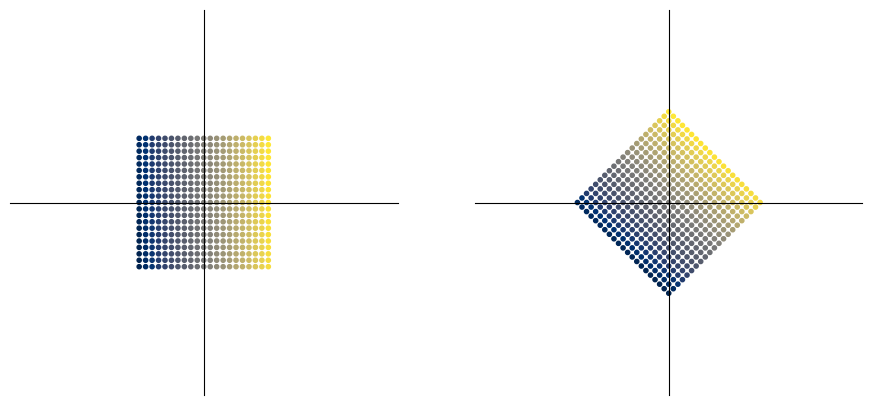

In [4]:
from numpy import pi, cos, sin

degree = 45
angle = pi * degree / 180
# angle = pi / 3

rotate = np.array([ [cos(angle), -sin(angle)], 
                    [sin(angle),  cos(angle)]])
print(f"{rotate[0, 0] :.3f}, {rotate[0, 1] :.3f}\n{rotate[1, 0] :.3f}, {rotate[1, 1] :.3f}")
rotated_v = np.empty_like(origin_v)

for i in range(origin_v.shape[0]):
    rotated_v[i] = np.matmul(rotate, origin_v[i])

plotVectors(origin_v, rotated_v)

Растяжение

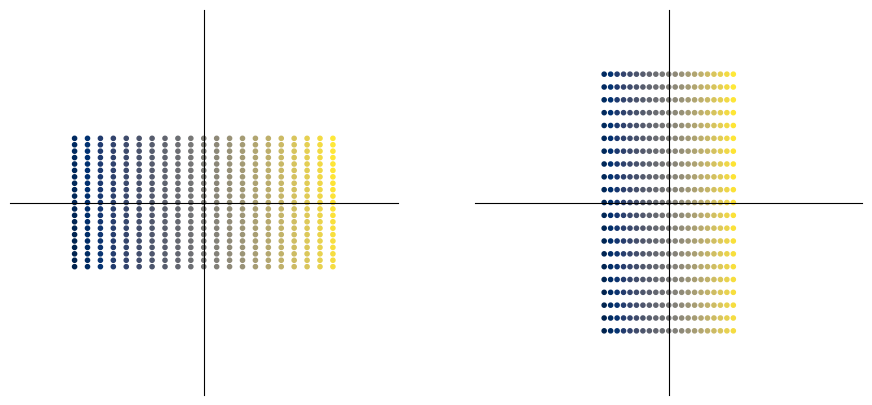

In [8]:
stretched_along_x = np.empty_like(origin_v)
stretched_along_y = np.empty_like(origin_v)
stretchX = np.array([[2, 0], 
                     [0, 1]])

stretchY = np.array([[1, 0], 
                     [0, 2]])

for i in range(origin_v.shape[0]):
    stretched_along_x[i] = np.matmul(stretchX, origin_v[i])
    stretched_along_y[i] = np.matmul(stretchY, origin_v[i])

plotVectors(stretched_along_x, stretched_along_y)

Зеркальное отражение

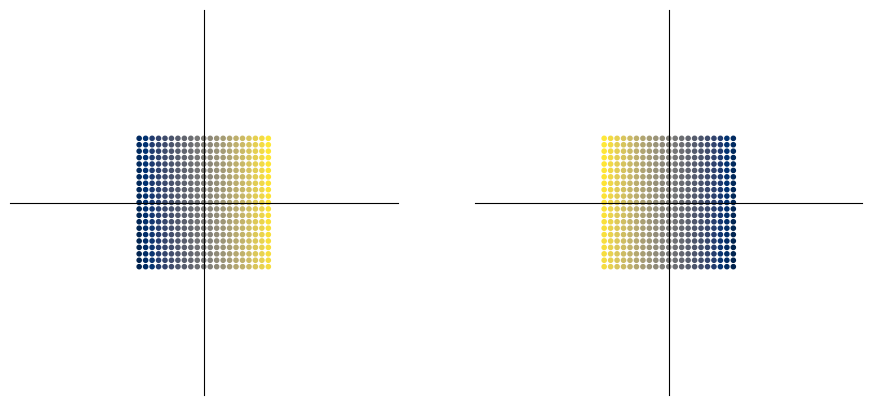

In [9]:
morrored_y = np.empty_like(origin_v)
mirrorY = np.array([[-1, 0], 
                    [0, 1]])
mirrorX = np.array([[1, 0], 
                    [0, -1]])

for i in range(origin_v.shape[0]):
    morrored_y[i] = np.matmul(mirrorY, origin_v[i])
    
plotVectors(origin_v, morrored_y)

Сдвиг вдоль осей

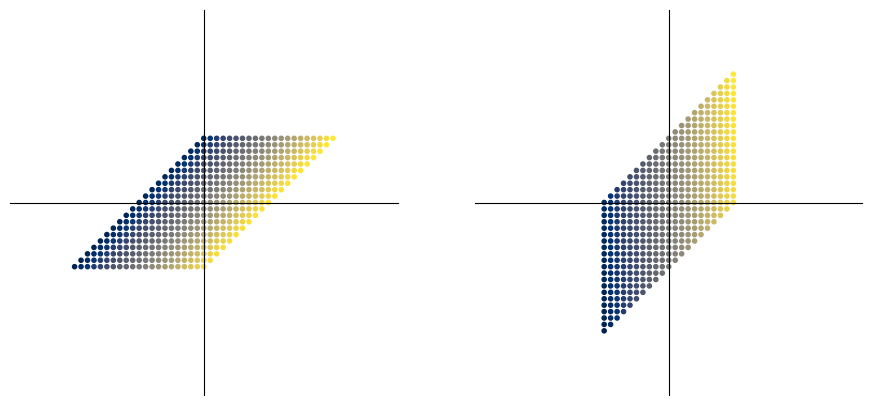

In [10]:
sheared_x = np.empty_like(origin_v)
sheared_y = np.empty_like(origin_v)
shearX = np.array([ [1, 1], 
                    [0, 1]])
shearY = np.array([ [1, 0], 
                    [1, 1]])

for i in range(origin_v.shape[0]):
    sheared_x[i] = np.matmul(shearX, origin_v[i])
    sheared_y[i] = np.matmul(shearY, origin_v[i])
    
plotVectors(sheared_x, sheared_y)

Композиция преобразований: поворот и растяжение

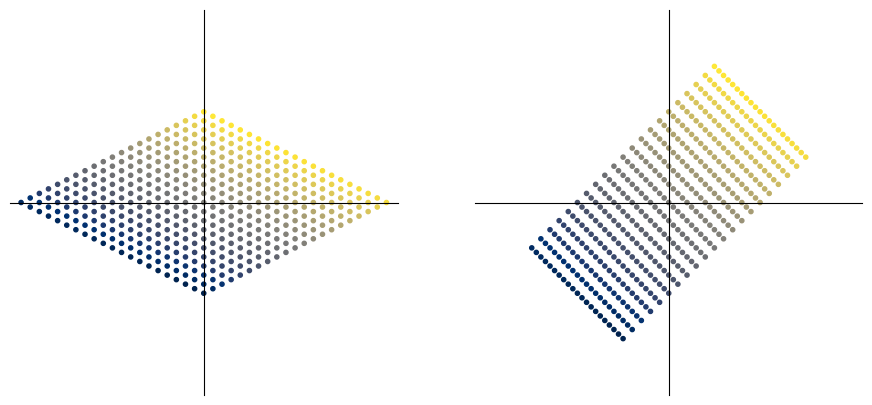

In [11]:
# последовательные трансформации
rs_v = np.empty_like(origin_v)
for i in range(origin_v.shape[0]):
    rs_v[i] = np.matmul(rotate, origin_v[i])    # поворот
    rs_v[i] = np.matmul(stretchX, rs_v[i])      # растяжение вдоль X

sr_v = np.empty_like(origin_v)
for i in range(origin_v.shape[0]):
    sr_v[i] = np.matmul(stretchX, origin_v[i])      # растяжение вдоль X
    sr_v[i] = np.matmul(rotate, sr_v[i])            # поворот

plotVectors(rs_v, sr_v)
# очевидно, что имеет значение порядок трансформаций

Того же результата можно добиться с использованием композиции матриц преобразования. Матричное произведения матриц A и B соответствует последовательным преобразованиям A и B. Заметим, что преобразование AB соответствует последовательным преобразованиям B, затем A. ABv = (AB)v = A(Bv)

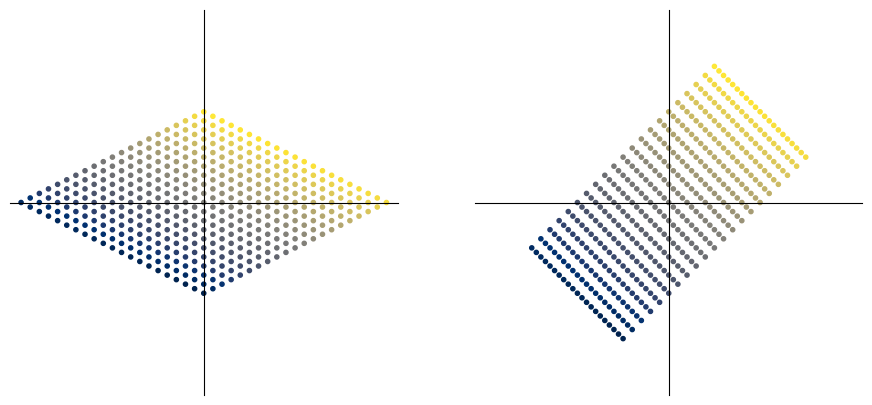

In [12]:
# композиция операторов поворота и растяжения:
sr_matrix = np.matmul(rotate, stretchX)     # растяжение, затем поворот
rs_matrix = np.matmul(stretchX, rotate)     # поворот, затем растяжение

rs_v = np.empty_like(origin_v)
sr_v = np.empty_like(origin_v)

for i in range(origin_v.shape[0]):
    rs_v[i] = np.matmul(rs_matrix, origin_v[i])
    sr_v[i] = np.matmul(sr_matrix, origin_v[i])

plotVectors(rs_v, sr_v)

### Аффинные преобразования (Affine Mappings)

Пусть $V$ - векторное пространство, $\mathbf{x_0} \in V$ и $U \subseteq V$ - подпространство. Тогда подмножество $$ L = \mathbf{x_0} + U = \{\mathbf{x_0} + \mathbf{u} : \mathbf{u} \in U\} = \{\mathbf{v} \in V|\exists \mathbf{u} \in U : \mathbf{v} = \mathbf{x_0} + \mathbf{u} \} \subseteq V$$ называется **аффинным подпространством** или **линейным многообразием** (linear manifod) пространства $V$. $U$ называется **направляющим пространством** (direction space) а $\mathbf{x_0}$ - **опорной точкой** (support point). Заметим, что аффинное подпространство не содержит нулевой вектор, если $\mathbf{x_0} \notin U$. Таким образом аффинное подпространство не является линейным подпространством $V$ для $\mathbf{x_0} \notin U$. Примерами аффинных подпространтств могут служить точки, прямые, плоскости в $\mathbb R^3$, которые могут и не проходить через точку $\mathbf 0$.<br> Аффинные подпространства часто описываются параметрами. Пусть имеется $k$-мерное аффинное пространство $ L =\mathbf{x_0} + U $ пространства $V$. Если $ \mathbf{b_1}, \ldots,\mathbf{b_k}) $ - упорядоченный базис пространства $U$, тогда каждый элемент $\mathbf{x} \in L$ может быть однозначно представлен как $$\mathbf{x} =\mathbf{x_0}+\lambda_1\mathbf{b_1} + \ldots + \lambda_k\mathbf{b_k} $$ где $ \lambda_1 \ldots  \lambda_k \in \mathbb R $. Такое предсталвение называется **параметрическим уравнением** аффинного пространства $L$ с направляющими векторами $\mathbf{b_1}, \ldots,\mathbf{b_k}$ и параметрами $ \lambda_1 \ldots  \lambda_k $.

**Аффинное преобразование**. Пусть $ \Phi: V \to W $ - линейное преобразование из векторного пространства $V$ в векторное пространтство $W$, и вектор $ \mathbf a\in W$. Тогда, преобразование $ \phi : V \to W $, при котором $ \mathbf x \mapsto \mathbf a + \Phi(\mathbf x)$, называется афинным преобразованием (affine mapping) из $V$ в $W$. Вектор $\mathbf a$ называется векторм перемещения преобразования $\phi$. <br>
Всякое аффинное преобразование является композицией линейного преобразования и перемещения.
Композиция аффинных преобразований также является аффинным преобразованием. 

#### Перемещение производится путем прибавления вектора смещения

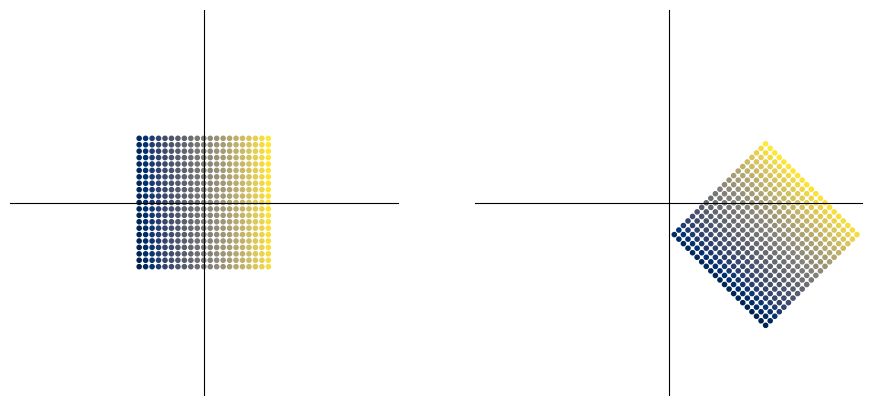

In [13]:
shift = np.array([1.5, -0.5])      # вектор перемещения
affine_v = np.empty_like(origin_v)

# сначала произведем линейное преобразование
for i in range(origin_v.shape[0]):
    affine_v[i] = np.matmul(rotate, origin_v[i])

affine_v = affine_v + shift         # перемещение

plotVectors(origin_v, affine_v)

Переход к однородным координатам позволяет избавиться от вектора перехода, и представить аффинное преобразование в виде матричного оператора.
Пусть афинное преобразование состоит из операции линейного преобразования, представленного матрицей $\mathbf M$ и сдвига на вектор $\mathbf a$. Тогда выражение для преобразования можно записать как $\bf Mx + a$. Здесь $\mathbf x$ и $\mathbf a$ - векторы размерности $d$, а $\mathbf M$ - матрица $d \times d$. 
$$ M =
\begin{bmatrix}
    m_{11} & \ldots & m_{1d} \\
    \vdots &        & \vdots \\
    m_{d1} & \ldots & m_{dd} \\
\end{bmatrix} $$
В результате преобразования получаем новый вектор $x'$.<br>
Перейдем к однородным координатам. Вектор $\mathbf w = (x_1, \ldots, x_d, 1)$ - представление вектора $\mathbf x$ в однородных координатах, и имеет размерность $d+1$. Тогда оператор аффинного преобразования $\mathbf M^\circ$ будет представлять собой матрицу размерности $(d+1) \times (d+1)$. Последний элемент кажой строки (кроме последней строки) будет содержать соответствующий компонет вектороа перехода $\mathbf a$. Последняя строка будет содержать нули, за исключением последнего элемента, который равен 1.
$$ M^\circ =
\begin{bmatrix}
    m_{11} & \ldots & m_{1d} & a_1      \\
    \vdots &        & \vdots &  \vdots  \\
    m_{d1} & \ldots & m_{dd} & a_d      \\
    0      & \ldots & 0      & 1      \\
\end{bmatrix} $$
В результате матричного умножения $\mathbf M^\circ$ на $\mathbf w$ образуется вектор $\mathbf w'$, который является представлением вектора $\mathbf x'$ в однородных координатах: $\mathbf w'=(x'_1,\ldots,x'_d,1)$.<br> Заметим, что если убрать из матрицы $\mathbf M^\circ$ последнюю строку, то произведение такой матрицы с размерностью $d \times (d+1)$ и вектора $\mathbf w$ образует вектор, размерности $d$, и это то будет вектор $\mathbf x'$. Последняя строка матрицы $\mathbf M^\circ$ позволяет нам оставаться в однородных координатах после преобразований.

(441, 2)


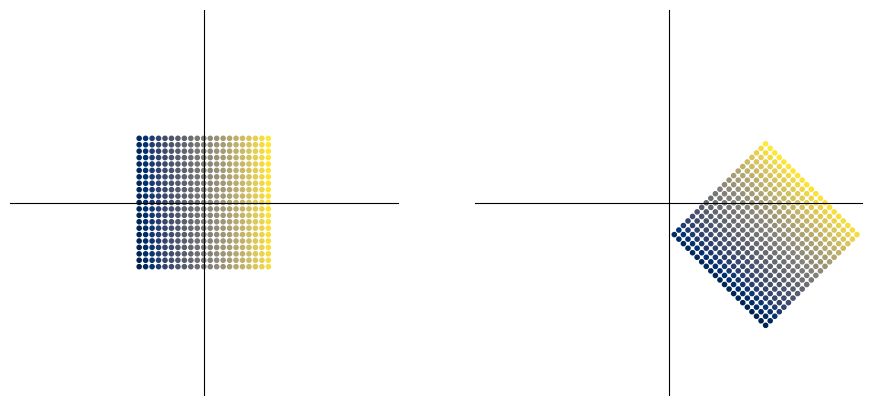

In [14]:
from numpy import vectorize

# получим в origin_hom однородные вектора из origin_v:
s = origin_v.shape
print(s)
origin_hom = np.ones(shape=(s[0], s[1]+1))
for i in range(s[0]):
    origin_hom[i, 0] = origin_v[i, 0]
    origin_hom[i, 1] = origin_v[i, 1]

# матрица афинного преобразования
rotate = np.array([ [cos(angle), -sin(angle), 1.5], 
                    [sin(angle), cos(angle), -0.5],
                    [         0,          0,    1] ])

# производим преобразование векторов
vectors_hom = np.empty(shape=origin_hom.shape)
for i in range(s[0]):
    vectors_hom[i] = np.matmul(rotate, origin_hom[i])

# переходим обратно к исходному представлению векторов
vectors_hom = vectors_hom.transpose()
s = vectors_hom.shape
vectors = np.empty(shape=(s[0]-1, s[1]))
vectors = vectors_hom[:-1]
vectors = vectors.transpose()

plotVectors(origin_v, vectors)

В линейной регресси часто модель представляет собой линейную функцию от нескольких переменных. В одномерном случае $f(x) = a + bx$, где $f(x)$ и $x$ - скаляры. В многомерном случае $\mathbf x = (x_1,\ldots,x_d)$ - вектор, а $f(\mathbf x)$ - скаляр, $a$ называется свободным членом (intercept), а $b$ - угловым кэффициентом (slope). Функция $f$ принимает вид:
$$f(\mathbf x) = a + b_1x_1+\ldots+b_dx_d = a + \bf bx$$
Уравнение $f(\mathbf x) = 0$ определяет плоскость в пространстве $\mathbb R^d$, перпендикулярную **нормальному вектору** $\mathbf b = (b_1,\ldots,b_d)$. <br>

In [ ]:
a = 2.
b = np.array([3, 4, 5, 6], dtype=np.float16)
x = np.array([3, 2, 4, 1], dtype=np.float16)

f = a + np.dot(b, x)
print(f)

Перейдем к однородным координатам. Положив в уравнении $\mathbf b^\circ = (b_1,\ldots,b_d, a)$ и $\mathbf x^\circ = (x_1,\ldots,x_d, 1)$ выразми $f$ в виде скалярного произведения двух векторов: 
$$ f(\mathbf x) = \bf b^\circ x^\circ $$

In [ ]:
# переход к однородным координатам:
d = b.shape[0]
b_hom = np.ones(shape=d+1, dtype=np.float16)
x_hom = np.ones(shape=d+1, dtype=np.float16)
b_hom[:-1] = b
b_hom[-1] = a
x_hom[:-1] = x

f = np.dot(b_hom, x_hom)
print(f)

Представим многомерную регрессию для $n$ образцов в матричной форме

$$
\begin{bmatrix}
    y_1     \\
    \vdots  \\
    y_n
\end{bmatrix} = 
\begin{bmatrix}
    1   \\
    \vdots  \\
    1
\end{bmatrix}a+
\begin{bmatrix}
    x_{11} & x_{1d}  \\
    \vdots & \vdots \\
    x_{n1} & x_{nd}
\end{bmatrix} 
\begin{bmatrix}
    b_1     \\
    \vdots  \\
    b_d
\end{bmatrix}
$$


$$ \mathbf y = \mathbf a + \mathbf X \mathbf b $$


Каждый элемент $y_i$ является результатом скалярного произведения $i$-ой строки $\mathbf X$ на вектор $\mathbf b$ и увеличенное на $a$.

In [ ]:
X = np.array([[1.0, 2.1, 3.2],
              [1.2, 3.0, 3.5],
              [0.9, 3.3, 2.7],
              [1.1, 2.5, 3.1]])

a = 2.1
b = np.array( [3.2, 4.1, 5.9])

y = np.matmul(X, b) + a
print(f"{y = }")

$x=\begin{bmatrix} 
y_1 \\ 
\vdots  \\
y_n
\end{bmatrix}=\begin{bmatrix}
    x_{11} & x_{1d} & 1 \\
    \vdots & \vdots & \vdots \\
    x_{n1} & x_{nd} & 1
\end{bmatrix}
$
\begin{bmatrix}
    b_1     \\
    \vdots  \\
    b_d     \\
    a
\end{bmatrix}

Переходя к однородным координатам получим
$$
\begin{bmatrix}
    y_1     \\
    \vdots  \\
    y_n
\end{bmatrix}
=
\begin{bmatrix}
    x_{11} & x_{1d} & 1 \\
    \vdots & \vdots & \vdots \\
    x_{n1} & x_{nd} & 1
\end{bmatrix}
\begin{bmatrix}
    b_1     \\
    \vdots  \\
    b_d     \\
    a
\end{bmatrix}
$$

$$ \bf y = X^\circ w $$
где $\mathbf w = (b_1,\ldots,b_d, a) $

In [127]:
s = X.shape
X_hom = np.ones(shape=(s[0], s[1]+1)).transpose()
X_hom[:-1] = X.transpose()
X_hom = X_hom.transpose()
print(X_hom)

w = np.empty(shape=len(b)+1)
w[-1] = a
w[:-1] = b

y = np.matmul(X_hom, w)
print(f"{w = }\n{y = }")

[[1.  2.1 3.2 1. ]
 [1.2 3.  3.5 1. ]
 [0.9 3.3 2.7 1. ]
 [1.1 2.5 3.1 1. ]]
w = array([3.2, 4.1, 5.9, 2.1])
y = array([32.79, 38.89, 34.44, 34.16])


### Eigenvalues and Eigenvectors
Пусть $\mathbf A \in \mathbb R^{n \times n}$ - квадратная матрица. Тогда $\lambda \in \mathbb R$ является **собственным значением** (*eigenvalue*) матрицы $\mathbf A$, a $\mathbf x \in \mathbb R^n \backslash \{\mathbf 0\}$ является **собственным вектором** (*eigenvector*) матрицы $\mathbf A$, если они удовлетворяют уравнению (*eigenvalue equation*):
$$
\mathbf {Ax} = \lambda \mathbf x
$$
Если $\mathbf x$ является собственным вектором матрицы $\mathbf A$, соответствующим собственному значению $\lambda$, то для любого $\mathbf c \in \mathbb R \backslash \{ 0\}$, вектор $c\mathbf x$ также является собственным вектором с тем же собственным значением:
$$
\mathbf A (c \mathbf x) = c \mathbf {Ax} = c \lambda \mathbf x = \lambda (c \mathbf x)
$$
так что все векторы, коллинеарные вектору $\mathbf x$ также являются собственными векторами матрицы $\mathbf A$.

$\lambda$ является собственным значением $\mathbf A \in \mathbb R^{n \times n}$ тогда и только тогда, когда **характеристический полином** $p_{\mathbf A}(\lambda) = \mathrm{det}(\mathbf A - \lambda \mathbf I^n)$ равен нулю, или, что тоже самое, $\mathrm{rk}(\mathbf A - \lambda \mathbf I^n) < n$. Соответственно, собственные значения можно найти из уравнения 
$$p_{\mathbf A}(\lambda) = \mathrm{det}(\mathbf A - \lambda \mathbf I^n) = 0
$$

Множество собственных векторов матрицы $\mathbf A$, соответствующих собственному значению $\lambda$ образуют **собственное подпространство** (*eigenspace*) и обозначается $E_{\lambda}$. Множество всех собственных значений $\mathbf A$ называется **собственным спектром** (*eigenspectrum*) или просто **спектром** (*spectrum*).

Пространство решений однородного уравнения $\mathbf{Mx=0}$ называется **ядром** (*kernel* or *null space*), и обладает размерностью $n - \mathrm{rk} (\mathbf M)$

Собственное пространство $E_{\lambda}$ является ядром матрицы $\mathbf A - \lambda \mathbf I$, т.е. $\mathbf x \in \mathrm{ker} (\mathbf A - \lambda \mathbf I)$. Так как $(\mathbf A - \lambda \mathbf I) \mathbf x = \mathbf 0$ и $\mathbf{x \neq 0}$, ядро матрицы $\mathbf A - \lambda \mathbf I$ содержит больше элементов, чем просто $\mathbf 0$. Таким образом, собственное пространство может быть найдено из решения системы линейных однородных уравнений 
$$
(\mathbf A - \lambda \mathbf I) \mathbf x = \mathbf 0
$$

In [10]:
import numpy as np
A = np.array([[4, 2],
              [1, 3]])
eigenvalues, eigenvectors = np.linalg.eig(A)
for i, value in enumerate(eigenvalues):
    vector = eigenvectors[:, i]
    print(f"for eigenvalue {value} the eigenvector is {vector}")

for eigenvalue 5.0 the eigenvector is [0.89442719 0.4472136 ]
for eigenvalue 2.0 the eigenvector is [-0.70710678  0.70710678]


In [11]:
I = np.array([[1, 0],
              [0, 1]])
eigenvalues, eigenvectors = np.linalg.eig(I)
for i, value in enumerate(eigenvalues):
    vector = eigenvectors[:, i]
    print(f"for eigenvalue {value} the eigenvector is {vector}")

for eigenvalue 1.0 the eigenvector is [1. 0.]
for eigenvalue 1.0 the eigenvector is [0. 1.]
